$Assignment 1$\
$190639B$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline

Question 1


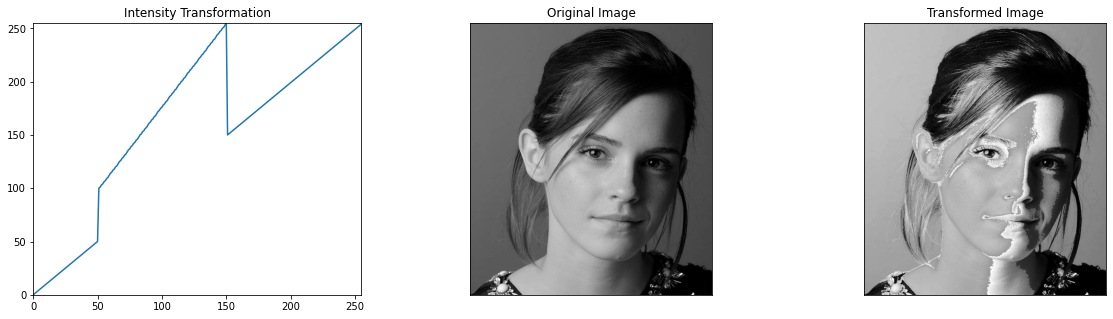

In [2]:
emma_img=cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert emma_img is not None

t1=np.linspace(0,50,51).astype(np.uint8)
t2=np.linspace(100,255,100).astype(np.uint8)
t3=np.linspace(150,255,105).astype(np.uint8)
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256

new_emma_img=cv.LUT(emma_img,t)

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(t)
ax[0].set_title("Intensity Transformation")
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)

ax[1].imshow(emma_img,cmap='gray',vmin=0,vmax=255)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Original Image")

ax[2].imshow(new_emma_img,cmap='gray',vmin=0,vmax=256)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Transformed Image")
plt.show()

Question 2(a)

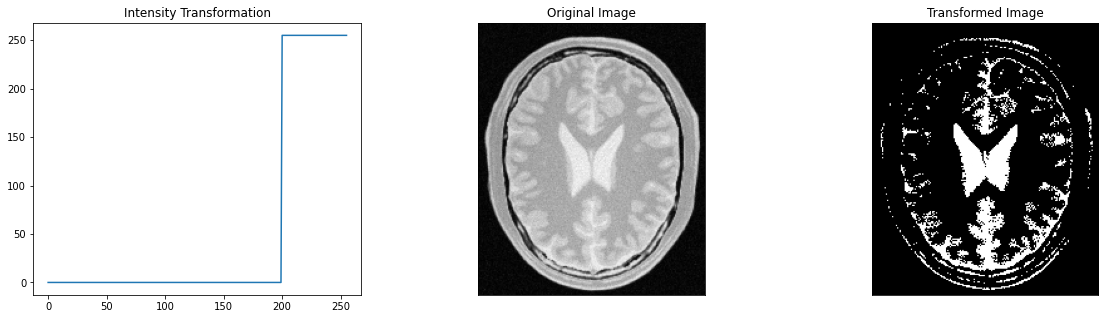

In [3]:
brain_img=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert brain_img is not None

t1=np.array([0 for r in range(0,200)])
t2=np.array([255 for r in range(200,256)])
t=np.concatenate((t1,t2),axis=0)
assert len(t)==256

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(t)
ax[0].set_title("Intensity Transformation")

new_brain_img=cv.LUT(brain_img,t)

ax[1].imshow(brain_img,cmap='gray',vmin=0,vmax=255)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Original Image")

ax[2].imshow(new_brain_img,cmap='gray',vmin=0,vmax=256)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Transformed Image")
plt.show()

2(b)

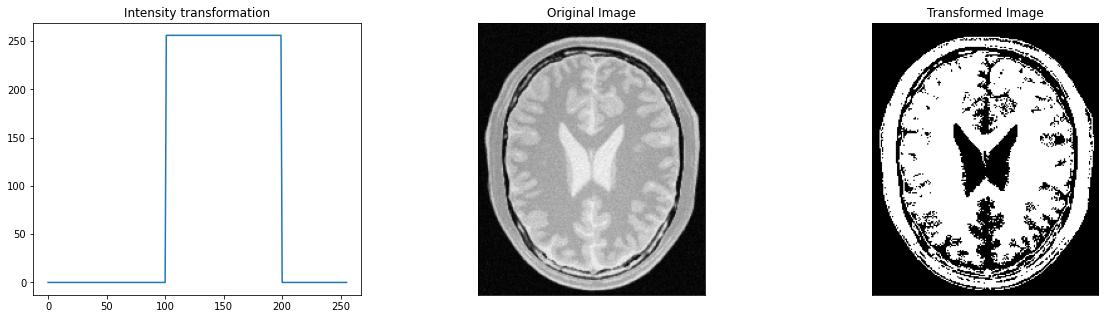

In [4]:
t1=np.array([0 for r in range(0,101)])
t2=np.array([256 for r in range(101,200)])
t3=np.array([0 for r in range(200,256)])
t=np.concatenate((t1,t2,t3),axis=0)
assert len(t)==256

fig,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].plot(t)
ax[0].set_title("Intensity transformation")

new_brain_img=cv.LUT(brain_img,t)
ax[1].imshow(brain_img,cmap='gray',vmin=0,vmax=255)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Original Image")

ax[2].imshow(new_brain_img,cmap='gray',vmin=0,vmax=256)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Transformed Image")
plt.show()

Question 3(a)

Used gamma value is 0.4

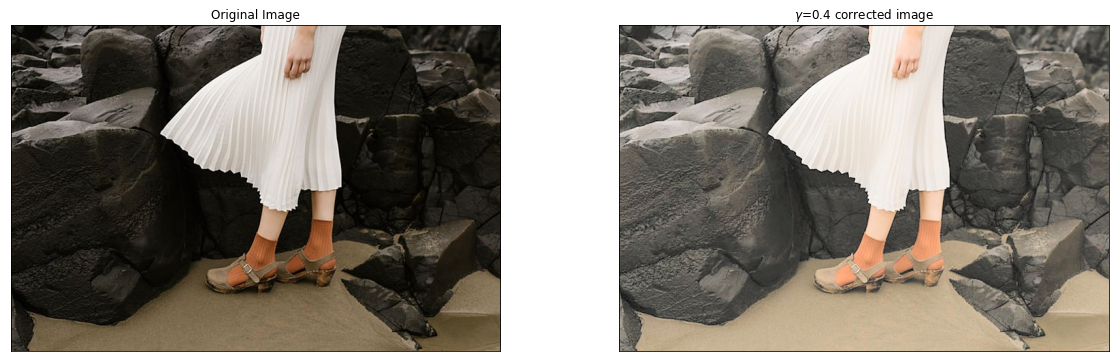

In [5]:
gamma_img=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert gamma_img is not None

LAB_img=cv.cvtColor(gamma_img,cv.COLOR_BGR2LAB)
gamma=0.4

t=np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
assert len(t)==256

L,A,B=cv.split(LAB_img)
new_L=cv.LUT(L,t)
new_gamma_img=cv.merge((new_L,A,B))

fig,ax=plt.subplots(1,2,figsize=(20,6))
ax[0].imshow(cv.cvtColor(gamma_img,cv.COLOR_BGR2RGB))
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original Image")

ax[1].imshow(cv.cvtColor(new_gamma_img,cv.COLOR_Lab2RGB))
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("${\gamma}$=0.4 corrected image")
plt.show()

3(b)


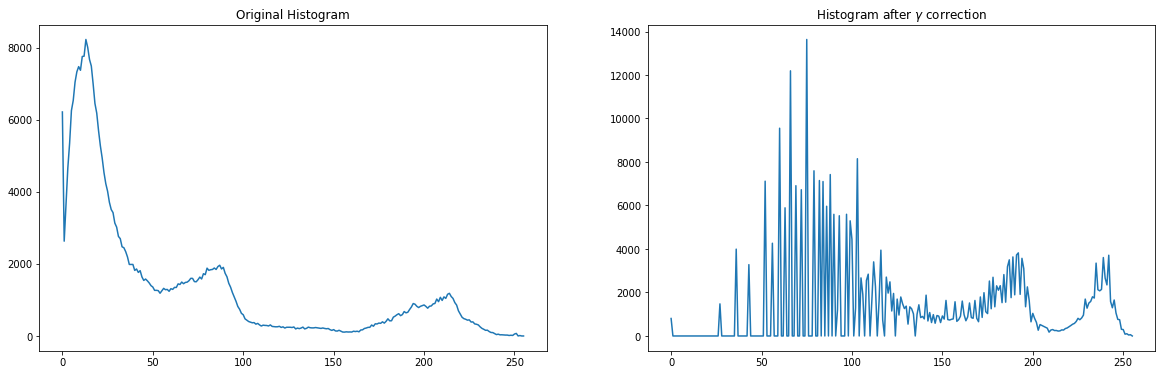

In [6]:
hist_gamma_img=cv.calcHist([gamma_img],[0],None,[256],[0,255])
hist_new_gamma=cv.calcHist([new_gamma_img],[0],None,[256],[0,255])
fig,ax=plt.subplots(1,2,figsize=(20,6))
ax[0].plot(hist_gamma_img)
ax[0].set_title("Original Histogram")
ax[1].plot(hist_new_gamma)
ax[1].set_title("Histogram after ${\gamma}$ correction")
plt.show()

Question 4

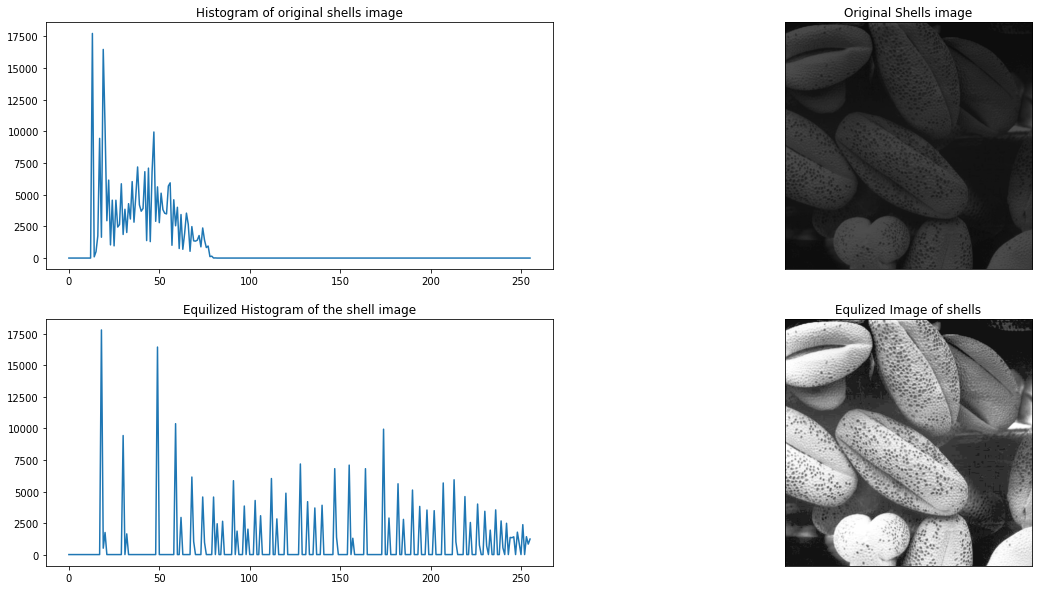

In [7]:
def plot_histograms(image):
    shell_img=cv.imread(image,cv.IMREAD_GRAYSCALE)
    assert shell_img is not None
    arrayOfNumberOfResalutionPoints=np.zeros((1,256))
    for r in range(0,256):
        arrayOfNumberOfResalutionPoints[0][r]=np.count_nonzero(shell_img==r)
    fig,axes=plt.subplots(2,2,figsize=(20,10))

    number_of_rows,number_of_coloumns=shell_img.shape

    axes[0][0].plot(arrayOfNumberOfResalutionPoints[0])
    axes[0][0].set_title("Histogram of original shells image")

    axes[0][1].imshow(shell_img,cmap='gray',vmin=0,vmax=255)
    axes[0][1].set_title("Original Shells image")
    axes[0][1].set_xticks([])
    axes[0][1].set_yticks([])

    equilized_values_of_histogram=np.zeros((1,256))

    for r in range(0,256):
        s=(255/(number_of_coloumns*number_of_rows))*np.sum(arrayOfNumberOfResalutionPoints[:,:r+1])
        equilized_values_of_histogram[0][r]=round(s)
    new_hist_equilized_img=cv.LUT(shell_img,equilized_values_of_histogram)

    arrayOfNumberOfResalutionPoints_ofNewEquilizedImg=np.zeros((1,256))
    for r in range(0,256):
        arrayOfNumberOfResalutionPoints_ofNewEquilizedImg[0][r]=np.count_nonzero(new_hist_equilized_img==r)

    axes[1][0].plot(arrayOfNumberOfResalutionPoints_ofNewEquilizedImg[0])
    axes[1][0].set_title("Equilized Histogram of the shell image")
    axes[1][1].imshow(new_hist_equilized_img,cmap='gray',vmin=0,vmax=255)
    axes[1][1].set_title("Equlized Image of shells")
    axes[1][1].set_xticks([])
    axes[1][1].set_yticks([])

    plt.show()
plot_histograms('shells.png')

Question 6
(a)

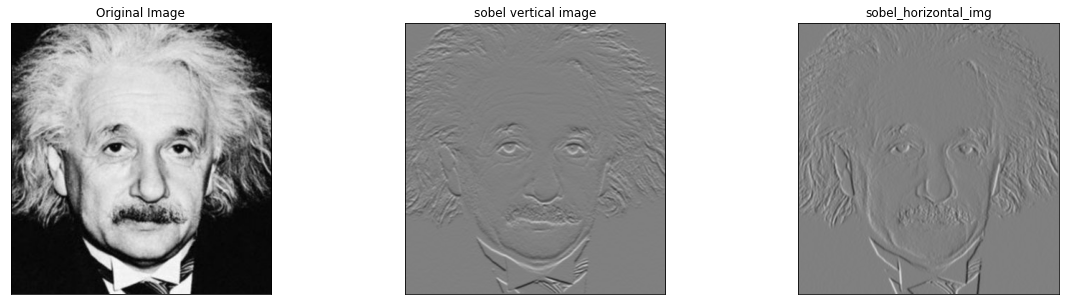

In [8]:
einsteine_img=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert einsteine_img is not None

vertical_kernel=np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
horizontal_kernel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
sobel_vertical_img=cv.filter2D(einsteine_img,-1,vertical_kernel)
sobel_horizontal_img=cv.filter2D(einsteine_img,-1,horizontal_kernel)

fig,axes=plt.subplots(1,3,figsize=(20,5))

axes[0].imshow(einsteine_img,cmap='gray')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('Original Image')

axes[1].imshow(sobel_vertical_img,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('sobel vertical image')

axes[2].imshow(sobel_horizontal_img,cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[2].set_title('sobel_horizontal_img')

plt.show()


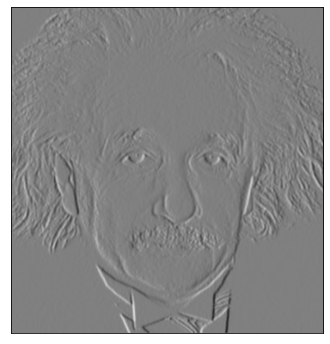

In [9]:
#part b
def sobel_filter(Image,kernel):
    y_len_of_kernel,x_len_of_kernel=kernel.shape
    assert x_len_of_kernel%2==1 and y_len_of_kernel%2==1
    midx_ofKernel,midy_ofKernel=x_len_of_kernel//2,y_len_of_kernel//2
    
    padding1,padding2=midx_ofKernel,midy_ofKernel
    padded_img= np.zeros((Image.shape[0] + padding1*2, Image.shape[1] + padding2*2))
    padded_img[int(padding1):int(-1 * padding1), int(padding2):int(-1 * padding2)] = Image
    
    resulted_img=np.zeros(Image.shape,dtype=np.float32)

    for x in range(Image.shape[1]):
        for y in range(Image.shape[0]):
            resulted_img[y,x]=(kernel*padded_img[y:y+y_len_of_kernel,x:x+x_len_of_kernel]).sum()
    return resulted_img

new_kernel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
img=sobel_filter(einsteine_img,np.flipud(np.fliplr(new_kernel)))
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(img,cmap='gray',vmin=-1020,vmax=1020)
ax.set_xticks([]),ax.set_yticks([])
plt.show()

Question 7 (a)

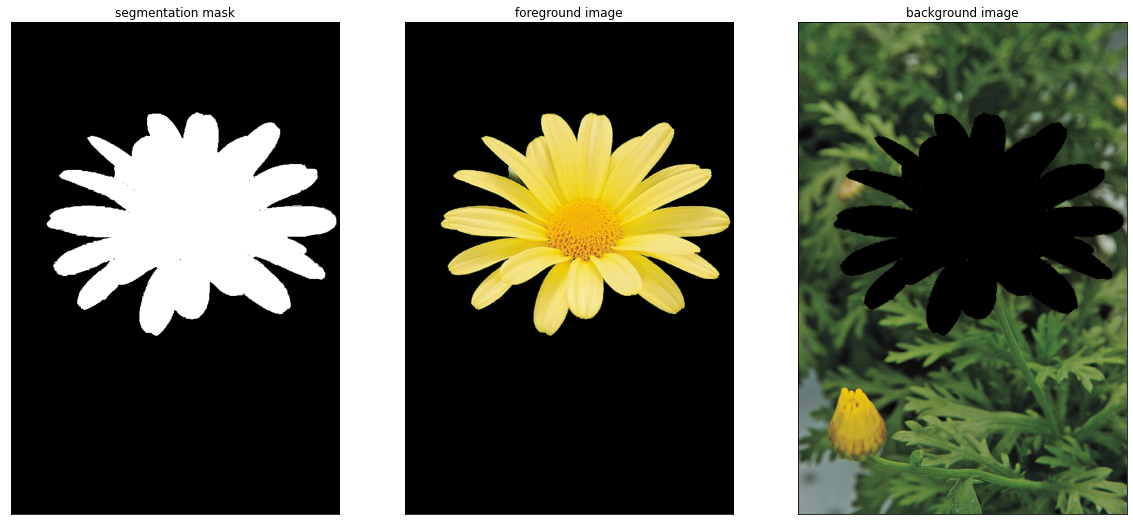

In [21]:
image = cv.imread('daisy.jpg',cv.IMREAD_COLOR)
mask = np.zeros(image.shape[:2], np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
rectangle = (25,125,530,450)

(mask,bgModel,fgModel)=cv.grabCut(image, mask, rectangle,bgModel, fgModel,3, cv.GC_INIT_WITH_RECT)
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),0, 1)
outputMask = (outputMask * 255).astype("uint8")

output = cv.bitwise_and(image, image, mask=outputMask)
backImage=image-output
fig,axes=plt.subplots(1,3,figsize=(20,10))
axes[0].imshow(cv.cvtColor(outputMask,cv.COLOR_BGR2RGB))
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[0].set_title('segmentation mask')
axes[1].imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[1].set_title('foreground image')
axes[2].imshow(cv.cvtColor(backImage,cv.COLOR_BGR2RGB))
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[2].set_title('background image')
plt.show()

